# 星火预习题目

⛔️ 内部资料，严禁转发

可通过[Tensorcircuit官方文档](https://tensorcircuit.readthedocs.io)等来源查询并学习包括符号意义、API使用方法等信息。

1-4 的题目最好在正式参与星火活动前完成，有余力这也可以尝试选做题。

## 1 环境配置

创建并激活一个 Python 3.8以上的环境, 通过以下方式安装 TensorCircuit:

pip install "tensorcircuit[cloud]"

并测试如下代码：

data: {'1': 526, '0': 498}
detail info: {'id': '3d0cd87f-a815-44d7-8658-675d363feac4', 'state': 'completed', 'at': 1720961156318339.0, 'shots': 1024, 'device': 'testing', 'results': {'0': 498, '1': 526}}
   ┌───┐┌───────┐
q: ┤ H ├┤ Rz(0) ├
   └───┘└───────┘


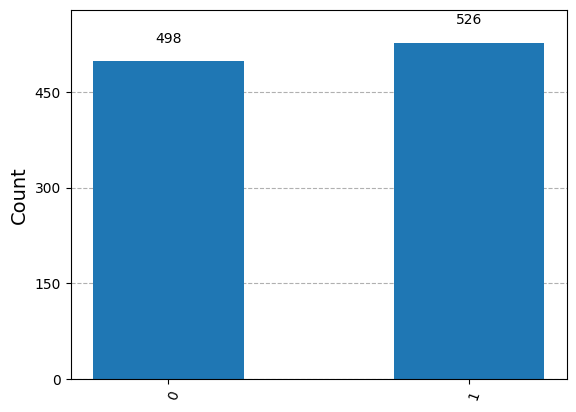

In [9]:
import tensorcircuit as tc
from tensorcircuit.cloud import apis
apis.set_provider("local")

# 调用本地code进行电路模拟
c = tc.Circuit(1)
c.H(0)
c.rz(0, theta=0)
U = c.matrix() # 量子门电路对应的矩阵
states = c.state() # 输出量子态
t = apis.submit_task(circuit=c, device="testing", shots=1024)
data = t.results(blocked=True) #产生0，1态的结果分布
print('data:', data)
detail = t.details() # 产生详细的参数信息
print("detail info:", t.details())

print(c.draw()) #电路可视化图像输出,可选 c.draw(output='mpl')
counts = t.results()
tc.results.counts.plot_histogram(counts) #柱状结果分布

## 2 向量和矩阵

考虑初始向量 $ v=(1, 0) $ ，给定二维矩阵 $$R(\theta) = \begin{pmatrix} \cos\theta &\sin\theta \\ -\sin\theta & \cos\theta \end{pmatrix}$$，
利用 Numpy 程序实现矩阵乘向量的计算 $v'=R(\theta)v$。通过可视化找到这一向量变化的几何意义。

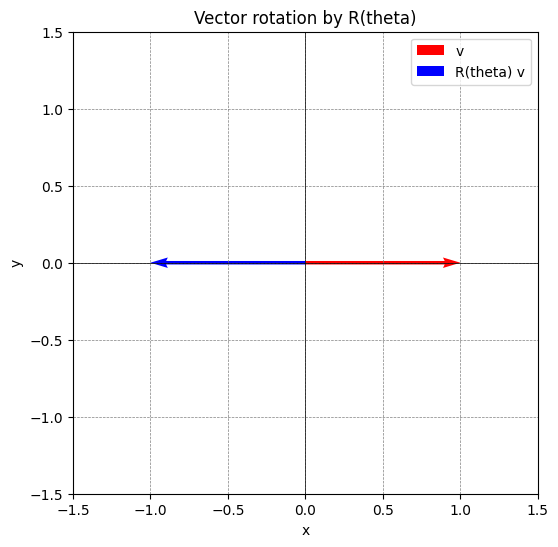

In [2]:
import numpy as np
import matplotlib.pyplot as plt

theta=np.pi
v0=np.array([1,0])
v1=np.array([[np.cos(theta),np.sin(theta)],[-np.sin(theta),np.cos(theta)]])@v0

origin = [0], [0]
plt.figure(figsize=(6, 6))
plt.quiver(*origin, v0[0], v0[1], color='r', angles='xy', scale_units='xy', scale=1, label='v')
plt.quiver(*origin, v1[0], v1[1], color='b', angles='xy', scale_units='xy', scale=1, label="R(theta) v")
plt.xlim(-1.5, 1.5)
plt.ylim(-1.5, 1.5)
plt.xlabel('x')
plt.ylabel('y')
plt.axhline(0, color='black',linewidth=0.5)
plt.axvline(0, color='black',linewidth=0.5)
plt.grid(color = 'gray', linestyle = '--', linewidth = 0.5)
plt.title('Vector rotation by R(theta)')
plt.legend()
plt.show()

几何意义：将$v$以$(0,0)$为中心顺时针旋转$\theta$度

### 2-2 矩阵指数

理解矩阵指数的含义，程序实现 $e^{i \hat P}$, $\hat{P}=\sigma_x, \sigma_y, \sigma_z$. $\sigma_x, \sigma_y, \sigma_z$ 是 $2*2$ 泡利矩阵。

考虑泰勒级数展开，试证明 $e^{i\theta\hat{P}} = \cos(\theta) I + \mathrm{i}\sin(\theta) \hat{P}$，并程序验证该公式的正确性。

根据解析证明，讨论以上矩阵欧拉公式成立对矩阵 $\hat{P}$ 形式的限制。

In [3]:
from scipy.linalg import expm

I=np.array([[1,0],[0,1]])
sigma_x=np.array([[0,1],[1,0]])
sigma_y=np.array([[0,-1j],[1j,0]])
sigma_z=np.array([[1,0],[0,-1]])
print("exp(i*sigma_x)\n",expm(1j*sigma_x))
print("exp(i*sigma_y)\n",expm(1j*sigma_y))
print("exp(i*sigma_z)\n",expm(1j*sigma_z))

theta=np.pi
print("exp(i*theta*sigma_x)\n",expm(1j*theta*sigma_x))
print("cos(theta)*I+i*sin(theta)*sigma_x\n",np.cos(theta)*I+1j*np.sin(theta)*sigma_x)
print("exp(i*theta*sigma_y)\n",expm(1j*theta*sigma_y))
print("cos(theta)*I+i*sin(theta)*sigma_y\n",np.cos(theta)*I+1j*np.sin(theta)*sigma_y)
print("exp(i*theta*sigma_z)\n",expm(1j*theta*sigma_z))
print("cos(theta)*I+i*sin(theta)*sigma_z\n",np.cos(theta)*I+1j*np.sin(theta)*sigma_z)

exp(i*sigma_x)
 [[0.54030231+0.j         0.        +0.84147098j]
 [0.        +0.84147098j 0.54030231+0.j        ]]
exp(i*sigma_y)
 [[ 0.54030231+0.j  0.84147098+0.j]
 [-0.84147098+0.j  0.54030231+0.j]]
exp(i*sigma_z)
 [[0.54030231+0.84147098j 0.        +0.j        ]
 [0.        +0.j         0.54030231-0.84147098j]]
exp(i*theta*sigma_x)
 [[-1.+0.00000000e+00j  0.+1.52695104e-16j]
 [ 0.+1.52695104e-16j -1.+0.00000000e+00j]]
cos(theta)*I+i*sin(theta)*sigma_x
 [[-1.+0.0000000e+00j  0.+1.2246468e-16j]
 [ 0.+1.2246468e-16j -1.+0.0000000e+00j]]
exp(i*theta*sigma_y)
 [[-1.00000000e+00+0.j  1.52695104e-16+0.j]
 [-1.52695104e-16-0.j -1.00000000e+00+0.j]]
cos(theta)*I+i*sin(theta)*sigma_y
 [[-1.0000000e+00+0.j  1.2246468e-16+0.j]
 [-1.2246468e-16+0.j -1.0000000e+00+0.j]]
exp(i*theta*sigma_z)
 [[-1.+1.2246468e-16j  0.+0.0000000e+00j]
 [ 0.+0.0000000e+00j -1.-1.2246468e-16j]]
cos(theta)*I+i*sin(theta)*sigma_z
 [[-1.+1.2246468e-16j  0.+0.0000000e+00j]
 [ 0.+0.0000000e+00j -1.-1.2246468e-16j]]


厄米矩阵存在正交归一基$\{v_{1},v_{2}\}$满足${P}=\sum_{j=1}^{2}\lambda_{j}v_{j}v_{j}^{\dagger}$

$e^{i\theta {P}}=\sum_{n\ge 0}\frac{(i\theta{P})^{n}}{n!}=\sum_{j=1}^{2}\left(\sum_{n\ge 0}\frac{(i\theta\lambda_{j})^{n}}{n!}\right)v_{j}v_{j}^{\dagger}=\sum_{j=1}^{2}(\cos (\theta \lambda_{j})+{\rm i}\sin (\theta\lambda_{j}))v_{j}v_{j}^{\dagger}$

当且仅当$\lambda_{j}=\pm 1$时$e^{i\theta{P}} = \cos(\theta) I + \mathrm{i}\sin(\theta) {P}$，即${P}$为幺正厄米矩阵

### 2-3 矩阵关于向量的期望

定义矩阵 $\hat{Q}$ 关于列向量 $v$ 的期望为以下标量：$$v^\dagger \hat{Q} v$$。
考虑 $v(\theta)=e^{i\theta/2\hat{P}}v_0$, $v_0=(1, 0)$, 且 $\hat{P}, \hat{Q}$ 均是泡利矩阵，实现程序计算该期望。

函数前两个输入为 0,1,2 之一的整数，分别确定 P 和 Q 是哪一个泡利矩阵，第三个输入为参数浮点数 $\theta$, 函数的输出为$\hat{Q}$在$\hat{v}$上的期望值。

可视化出不同泡利矩阵组合下期望随参数$\theta$变化的曲线，讨论其规律。

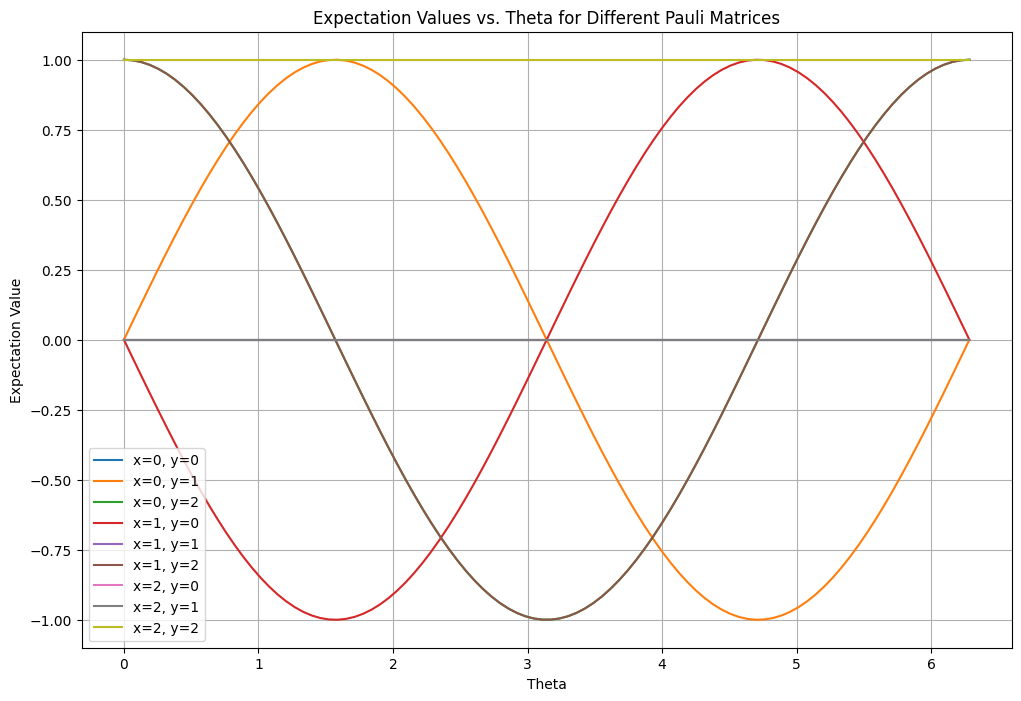

In [4]:
def calc(x,y,theta):
    P=Q=sigma_x
    if (x==1): P=sigma_y
    if (x==2): P=sigma_z
    if (y==1): Q=sigma_y
    if (y==2): Q=sigma_z
    v1=expm(0.5j*theta*P)@v0
    return np.real(v1.conj()@Q@v1)

x_vals = [0, 1, 2]
y_vals = [0, 1, 2]
theta_vals = np.linspace(0, 2*np.pi, 100)
results = np.zeros((len(x_vals), len(y_vals), len(theta_vals)))
for i, x in enumerate(x_vals):
    for j, y in enumerate(y_vals):
        for k, theta in enumerate(theta_vals):
            results[i, j, k] = calc(x, y, theta)
plt.figure(figsize=(12, 8))
for i, x in enumerate(x_vals):
    for j, y in enumerate(y_vals):
        label = f"x={x}, y={y}"
        plt.plot(theta_vals, results[i, j], label=label)
plt.title('Expectation Values vs. Theta for Different Pauli Matrices')
plt.xlabel('Theta')
plt.ylabel('Expectation Value')
plt.legend()
plt.grid(True)
plt.show()

$f_{x,y}(\theta)=\begin{cases}\sin\theta & x=0,y=1\\-\sin\theta&x=1,y=0\\\cos\frac{\theta}{2}&x\in \{0,1\},y=2\\1&x=y=2\\0&otherwise\end{cases}$

### 2-4 张量积

理解矩阵张量积的含义，$X\otimes I\otimes I\otimes Z$ 可简记为 $X_0Z_3$。
程序生成如下矩阵（输入 n）：

$$H = \sum_{i=0}^{n-1} Z_i\otimes I_{n-i-1} + \sum_{i=0}^{n-2} X_i\otimes I_{n-i-1}X_{i+1}\otimes I_{n-i} ,$$

并求该矩阵 $H$ 在向量 $(1,0,0,....)$ 下的期望值。

In [5]:
n=3
H=np.zeros((2**n,2**n))
for i in range(n):
    s=np.array([[1]])
    for j in range(n):
        if (i==j): s=np.kron(s,sigma_z)
        else: s=np.kron(s,I)
    H+=s
for i in range(n-1):
    s=np.array([[1]])
    for j in range(n):
        if ((i==j)or(i+1==j)): s=np.kron(s,sigma_x)
        else: s=np.kron(s,I)
    H+=s
v=np.zeros(2**n)
v[0]=1
print(v.conj()@H@v)

3.0


### 2-5 狄拉克符号

记列向量 $\vert 0\rangle = \begin{pmatrix}1\\0 \end{pmatrix}$, $\vert 1\rangle = \begin{pmatrix}0\\1 \end{pmatrix}$, $\vert 00\rangle = \begin{pmatrix}1\\0\\0\\0 \end{pmatrix}$，尝试用 Dirac 符号的语言，重写上述小节涉及的矩阵关系和定义式。并写出 $\frac{1}{\sqrt{2}}(\vert 010\rangle -\vert 101\rangle)$ 代表的列向量。

$Z_i\otimes I_{n-i-1}$即将$|a_{1}a_{2}...a_{n}\rang$转移到$(-1)^{a_{i}}|a_{1}a_{2}...a_{n}\rang$

$X_i\otimes I_{n-i-1}X_{i+1}\otimes I_{n-i}$即将$|a_{1}a_{2}...a_{n}\rang$转移到$|a_{1}a_{2}...\overline{a_{i}}\overline{a_{i+1}}...a_{n}\rang$

$H|00...0\rang=n|00...0\rang+|1100...0\rang+|01100...0\rang+...+|00...011\rang$，与$|00...0\rang$内积为$n$

$\frac{1}{\sqrt{2}}(\vert 010\rangle -\vert 101\rangle)=\frac{1}{\sqrt{2}}\begin{pmatrix}0\\0\\1\\0\\0\\-1\\0\\0\end{pmatrix}$

## 3 测量

### 3-1 线路期望计算

Q: 给定以下线路，试利用 TensorCircuit API 计算其期望 $\langle Z_0Z_1 \rangle$。

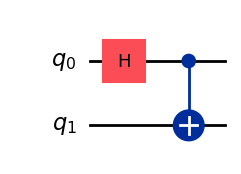

In [6]:
c = tc.Circuit(2)
c.h(0)
c.cx(0, 1)
c.draw(output="mpl")

A: 利用c.state()求得量子态或对应的密度矩阵$\rho$，利用$\langle Z_0Z_1 \rangle=Tr(\rho Z_0Z_1)$计算可得。

In [7]:
v=c.state()
rho=np.outer(v,v.conj())
print((rho@np.kron(sigma_z,sigma_z)).trace())

(0.9999999403953552+0j)


### 3-2 基于测量结果近似期望

Q: 利用 TensorCircuit API 对以上线路进行若干次测量，得到一些 0 1 的比特串的结果，并尝试利用这些测量的 bitstring 来估计期望 $\langle Z_0Z_1 \rangle$。

A: ZZ对角元上相应的基矢为，00，01，10，11，矩阵元或本征值为1，-1，-1，1，将bitstring中相应的基矢转换为prob，与本征值进行加权平均即可。

In [37]:
E=0
for i in range(1024):
    if (c.measure(0,1)[0].sum()!=1): E+=1
    else: E-=1
print(E)

1024
